# Regression
L'objectif de cette session est de comprendre les problèmes de régression et l'approche analytique pour les résoudre. Ce notebook aborde des notions théoriques et contient des parties pratiques.

Voici les principales étapes du notebook :

1. Qu'est-ce que la régression ?
2. Focus sur la régression linéaire
3. Préparation
4. Implémentation d'une régression linéaire
5. Amélioration du modèle


## 1. Qu'est ce que la régression ?

La régression en apprentissage automatique consiste en des méthodes mathématiques permettant de prédire une variable continue (y) en fonction de la valeur d'une ou plusieurs variables explicatives (x).

### Exemple en 1D

x = Nombre d'avions dans un secteur de l'espace aérien

y = Évaluation subjective de la charge de travail du contrôleur aérien


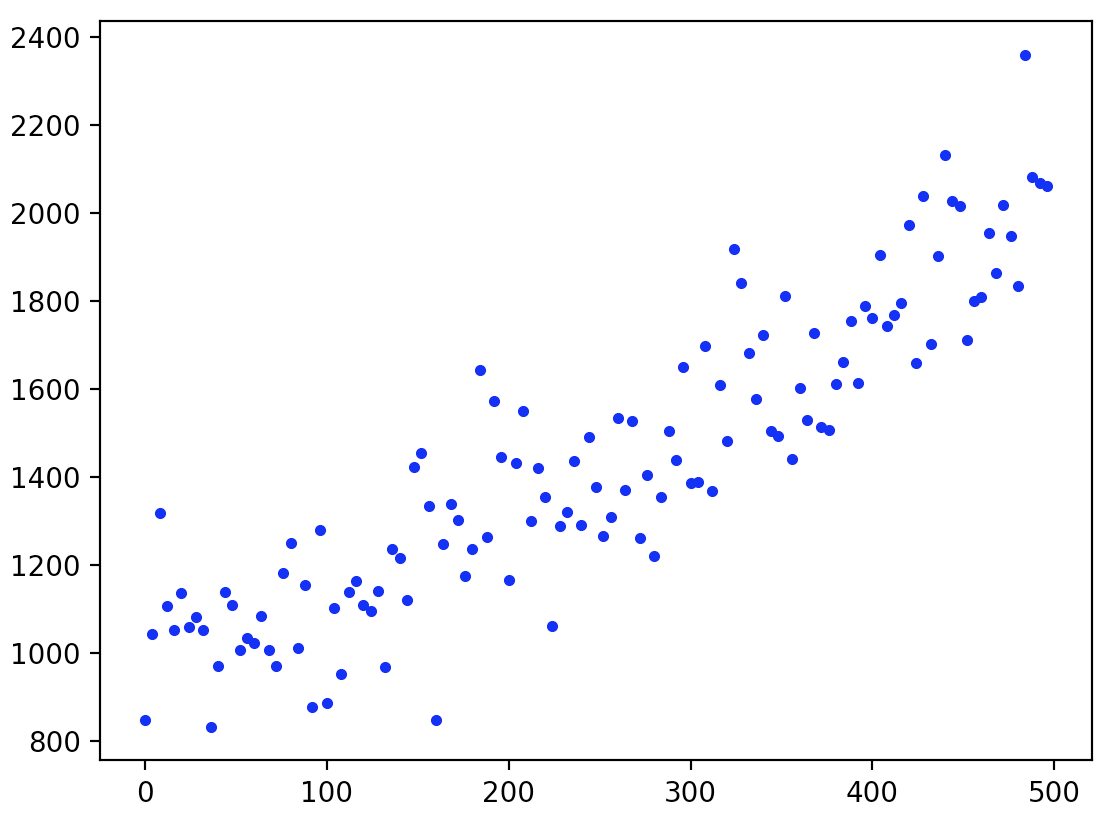

Pour prédire la charge de travail du contrôleur aérien, nous devons trouver la meilleure fonction
𝑦 =𝑓(𝑥). Pour cela, nous allons définir une erreur et déterminer la fonction qui minimise cette erreur.

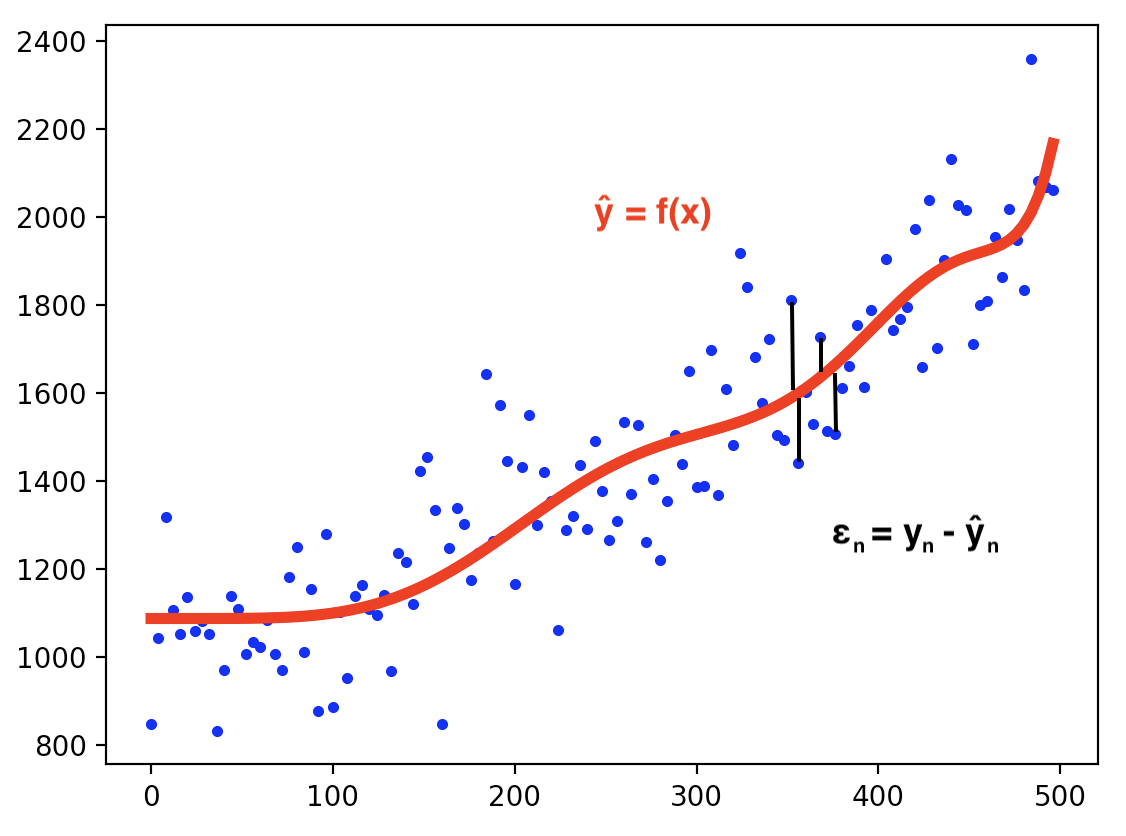

### Généralisation

En réalité, nous traitons souvent plusieurs variables explicatives, et la dimensionnalité des données d'entrée est supérieure à 1.

$$x = (x_1,...,x_n)$$
$$\hat{y} = f(x_1,...,x_n)$$

Si nous revenons à notre exemple du contrôle du trafic aérien, la charge de travail du contrôleur aérien peut être une fonction à la fois du nombre d'aéronefs et des conditions météorologiques.

## 2. Focus sur la régression linéaire

La régression linéaire est une régression utilisant une fonction linéaire ŷ = ax + b

### Exemple en 1D

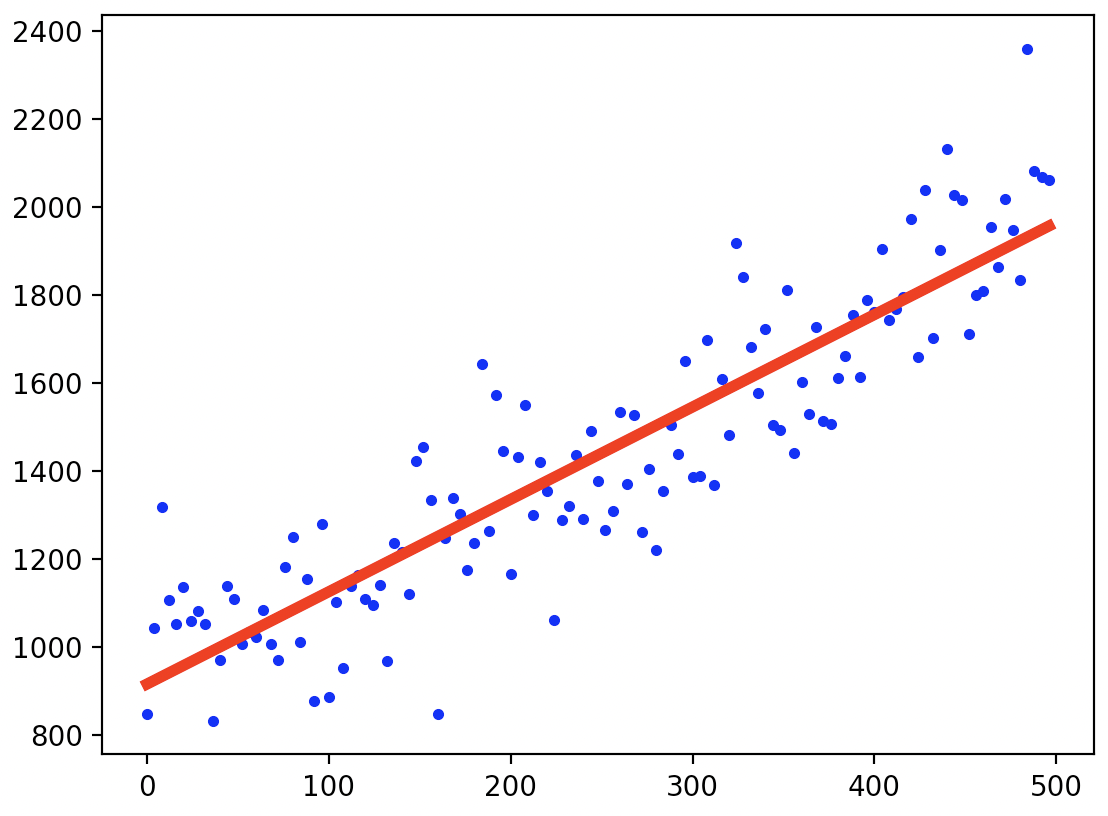

### Généralisation

En réalité, nous traitons souvent plusieurs variables explicatives, et la dimensionnalité des données d'entrée est supérieure à 1. La fonction linéaire prendra la forme suivante :

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$$

Mettons maintenant cela en pratique avec le jeu de données RateBeer !

 # 3. Préparation

### Import des modules

In [1]:
import pandas as pd
from wordcloud import STOPWORDS
import numpy as np
from sklearn import (
    linear_model,
    preprocessing,
    pipeline,
    model_selection,
    metrics,
    compose,
)
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib as mpl

mpl.rcParams['agg.path.chunksize'] = 10000
pd.set_option("display.precision", 2)
sns.set_style("whitegrid")
sns.set_context(rc={"patch.linewidth": 0.15})

##Implémentation d'une régression linéaire
Dans cette première section, vous allez entraîner un modèle de régression linéaire pour prédire la note globale d'une critique en fonction de ses autres évaluations. Pour cela, vous allez :

1. Charger et décrire les données
2. Diviser les données en ensemble d'entraînement et de test
3. Entraîner et évaluer le modèle de régression linéaire

 ## Chargement et découverte des données

In [2]:
df_master = pd.read_parquet("/content/sample_data/ratebeer_sample_clean.parquet")

In [3]:
df_master.head()

,beer,brewery,alcohol,type,rating_appearance,rating_aroma,rating_palate,rating_taste,rating,timestamp,user,text
2747119,Breckenridge Oatmeal Stout,383,4.95,Stout,4,7,4,7,14,1217462400,blutt59,"bottle, oat nose with black color, bitter choc..."
680733,De Dolle Arabier,1163,8.00,Belgian Strong Ale,4,9,4,8,18,1291939200,AndreaDel,"Bottle. Orange color, big head. Aroma is hoppy..."
2797108,Grafensteiner Pils,2545,4.70,Classic German Pilsener,3,7,4,5,9,1306108800,Koelschtrinker,"Die Frage ist, ob ich das selbe Bier wie die a..."
824617,New Glarus Raspberry Tart,1248,4.00,Fruit Beer,4,8,5,8,16,1211760000,polomagnifico,"Bottle thanks to nflmvp, thanks Steve! Aroma ..."
2730732,Nils Oscar Hop Yard IPA,1086,7.30,India Pale Ale (IPA),4,7,4,8,15,1275004800,dEnk,"Bottle, tfs Vaiz! Brownish amber, small head, ..."


In [4]:
df_master.shape

(200000, 12)

 ## Splits: Train/test & features/target

L'objectif de l'apprentissage supervisé est de construire un modèle qui fonctionne bien sur de nouvelles données. Si vous disposez de nouvelles données, il est judicieux d'évaluer la performance de votre modèle sur celles-ci. Le problème est que vous n'avez peut-être pas de nouvelles données, mais vous pouvez simuler cette situation en divisant votre jeu de données en ensembles d'entraînement et de test.

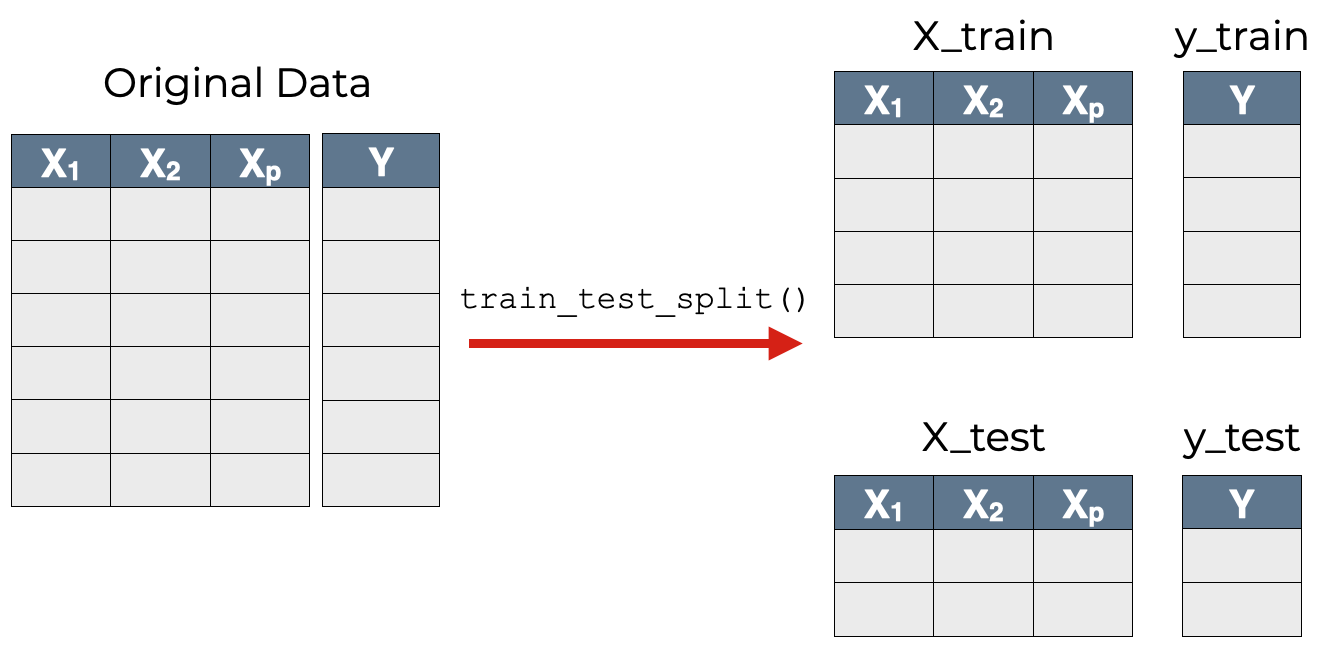

 ### Train/test split
Gardez 10% des données dans le jeu de test

In [5]:
(
    df_features_and_target_train,
    df_features_and_target_test,
) = model_selection.train_test_split(
    df_master,
    test_size=0.1 # LINE TO BE REMOVED FOR STUDENTS
)

 ### Features/target split
Divisez le jeu de données en gardant :
 - seulement les features voulus
 - N lignes dans le jeu d'entraînement

In [6]:
def split_features_and_target(
    df_features_and_target_train,
    df_features_and_target_test,
    features,
    target,
    N=None,
):
    if N is None :
        X_train = df_features_and_target_train[features]
        y_train = df_features_and_target_train[target]
    else :
        X_train = df_features_and_target_train[features].sample(N)
        y_train = df_features_and_target_train[target].loc[X_train.index]
    X_test = df_features_and_target_test[features]
    y_test = df_features_and_target_test[target]
    return X_train, y_train, X_test, y_test


target = [
    "rating" # LINE TO BE REMOVED FOR STUDENTS
]
features = [
    "alcohol", # LINE TO BE REMOVED FOR STUDENTS
    "rating_appearance",
    "rating_aroma",
    "rating_palate",
    "rating_taste"
]
X_train, y_train, X_test, y_test = split_features_and_target(
    df_features_and_target_train, # LINE TO BE REMOVED FOR STUDENTS
    df_features_and_target_test, # LINE TO BE REMOVED FOR STUDENTS
    features, # LINE TO BE REMOVED FOR STUDENTS
    target, # LINE TO BE REMOVED FOR STUDENTS
)

### Entraînement du modèle & evaluation

 ### Entraînement du modèle
Utilisez un pipeline pour encapsuler le modèle avec ses étapes de prétraitement automatisées.

In [7]:
pipe = pipeline.make_pipeline(
    linear_model.LinearRegression(),
)

pipe.fit(
    X_train, # LINE TO BE REMOVED FOR STUDENTS
    y_train # LINE TO BE REMOVED FOR STUDENTS
)

Pipeline(steps=[('linearregression', LinearRegression())])

 ### Evaluation du modèle

##### R2 score

Pour évaluer la performance de notre modèle, plusieurs métriques peuvent être utilisées. La plus simple pour la régression est le $R^2$. Elle est utilisée pour mesurer la qualité de la fonction de régression par rapport aux données.

$$R^2 = 1 - \frac{\sum_{i}{(y_i - \hat{y}_i)^2}}{\sum_{i}{(y_i - \bar{y}_i)^2}}$$

 #### R2 en pratique

In [8]:
score_train = pipe.score(
    X_train,
    y_train
)
score_test = pipe.score(
    X_test, # LINE TO BE REMOVED FOR STUDENTS
    y_test # LINE TO BE REMOVED FOR STUDENTS
)

print(f"R2 (train): {score_train}")
print(f"R2 (test): {score_test}")

R2 (train): 0.8056911066244175
R2 (test): 0.8082230594008261


 #### Analyse des résidus
Définissez un DataFrame contenant les valeurs réelles et prédites de y, ainsi que le résidu, qui correspond à la différence entre les valeurs réelles et prédites.

Plottez les résidus à l'aide d'histogrammes et de violinplots.


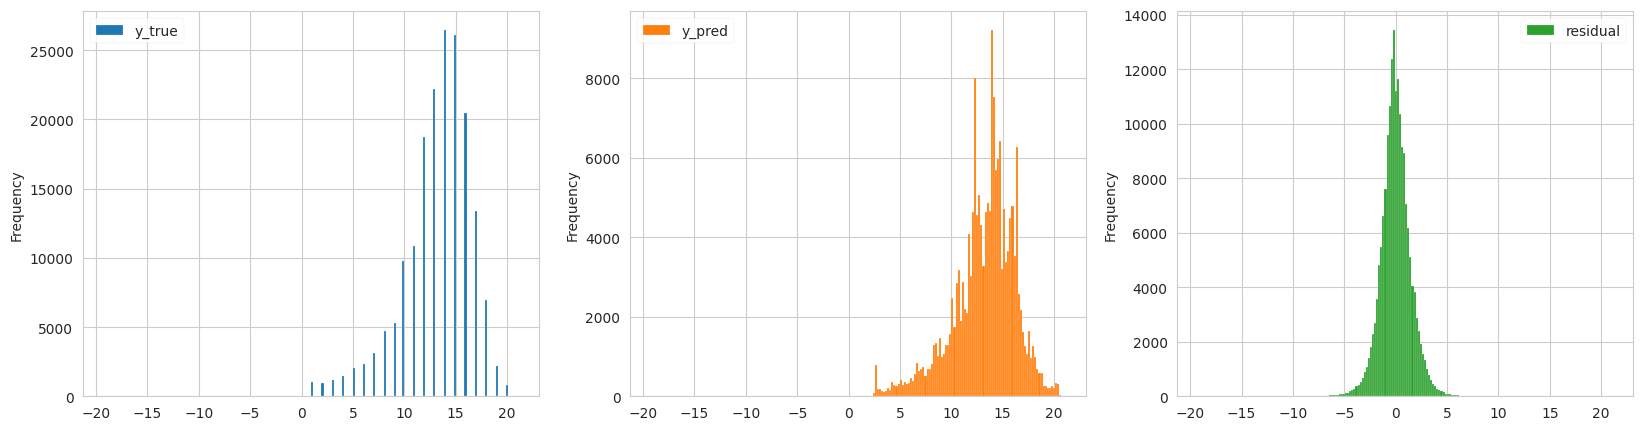

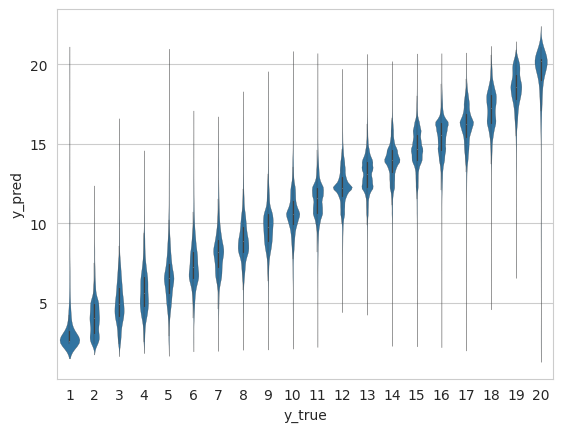

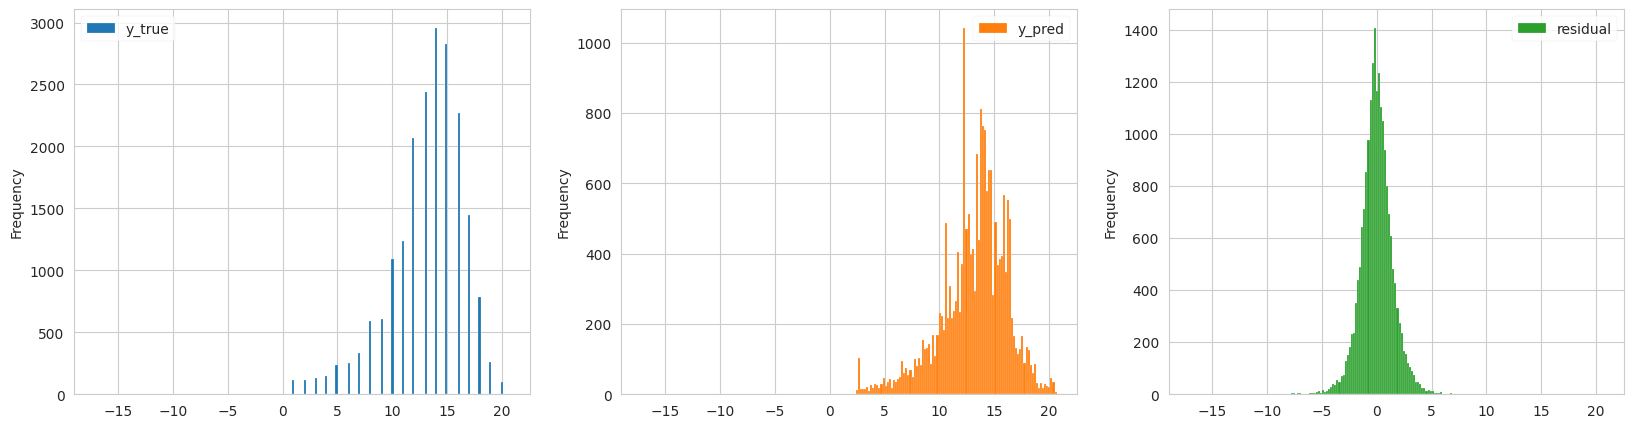

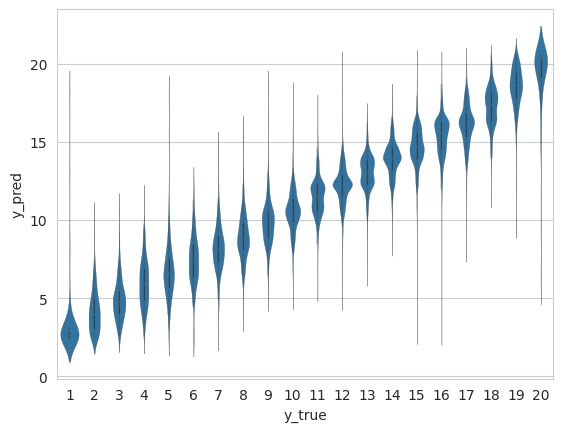

In [9]:
def compute_df_residual(pipe, X, y):
    return pd.DataFrame(
        {
            "y_true": y.rating.reset_index(drop=True),
            "y_pred": pipe.predict(X).reshape(-1),
        }
    ).assign(residual=lambda df: df.y_true - df.y_pred)


def plot_residual(df_residual):
    df_residual.plot.hist(bins=200, subplots=True, layout=(1,3), figsize=(20, 5))
    plt.show()
    sns.violinplot(data=df_residual, x="y_true", y="y_pred")


df_residual_train = compute_df_residual(pipe, X_train, y_train)
df_residual_test = compute_df_residual(pipe, X_test, y_test)
plot_residual(df_residual_train)
plot_residual(df_residual_test)

##### Autres métriques de régression

Une autre métrique populaire est l'erreur quadratique moyenne (MSE - Mean Squared Error) :

$$MSE = \frac{1}{N} \sum_{i}(y_i – \hat{y}_i)^2$$

Cette métrique est intéressante lorsque l'on souhaite pénaliser fortement les grandes erreurs. Cependant, elle est difficile à interpréter, car elle n'est pas exprimée dans la même unité que la variable cible.

C'est pourquoi l'erreur quadratique moyenne racine (RMSE - Root Mean Squared Error) est largement utilisée :

$$RMSE = \sqrt{\frac{1}{N} \sum_{i}(y_i – \hat{y}_i)^2}$$

Enfin, l'erreur absolue moyenne (MAE - Mean Absolute Error) est encore plus interprétable, car elle correspond à l'erreur moyenne en valeur absolue :

$$MAE = \frac{1}{N} \sum_{i}\lvert(y_i – \hat{y}_i)\lvert$$

 #### Autres métriques en pratique
Calculez un ensemble de métriques sur les ensembles de données d'entraînement et de test :

- RMSE négatif
- MAE négatif
- MSE négatif

NB : Une fonction de "score" dans sklearn suit le principe du "plus c'est grand, mieux c'est". C'est pourquoi les fonctions d'erreur sont converties en leurs versions négatives afin de respecter ce principe.

In [10]:
def compute_score(pipe, X, y, metric_names=None, label=None, verbose=False):
    if metric_names is None:
        metric_names = ["neg_root_mean_squared_error"]
    scores = dict()
    for metric_name in metric_names:
        metric = metrics.get_scorer(metric_name)
        score = metric(pipe, X, y)
        printed_label = f" ({label})" if label else ""
        if verbose:
            print(f"{metric_name}{printed_label}: {score:.3g}")
        scores.update({f"{metric_name}{printed_label}": score})
    return scores


metric_names = [
    "neg_root_mean_squared_error",
    "neg_mean_absolute_error",
    "neg_mean_squared_error",
]
score_train = compute_score(
    pipe, X_train, y_train, metric_names, label="train", verbose=True
)
score_test = compute_score(
    pipe, X_test, y_test, metric_names, label="test", verbose=True # LINE TO BE REMOVED FOR STUDENTS
)

neg_root_mean_squared_error (train): -1.48
neg_mean_absolute_error (train): -1.09
neg_mean_squared_error (train): -2.18
neg_root_mean_squared_error (test): -1.48
neg_mean_absolute_error (test): -1.09
neg_mean_squared_error (test): -2.18


 #### Feature importance
Plottez les coefficients du modèle dans un diagramme en barres.

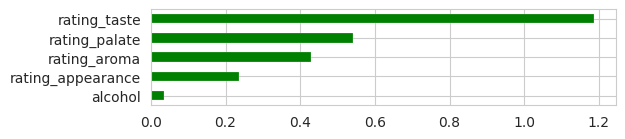

In [11]:
def get_feature_names(pipe, X):
    return (
        X.columns
        if len(pipe) == 1
        else pipe[:-1].get_feature_names_out(X.columns)
    )


def plot_features_coefficients(pipe, X):
    df_coef = pd.DataFrame(
        {"coef": pipe[-1].coef_.reshape(-1)}, index=get_feature_names(pipe, X)
    ).assign(color=lambda df: (df.coef >= 0).map({True: "g", False: "r"}))
    df_coef.coef.plot(
        kind="barh", color=df_coef.color, figsize=(6, len(df_coef) * 0.25)
    )


plot_features_coefficients(pipe, X_train)

Les coefficients de la régression linéaire peuvent être trompeurs ! Ils ne représentent pas l'importance des variables si les variables explicatives ne sont pas comparables.

 # Amélioration du modèle

 ## Feature engineering

#### Gestion des outliers

<Axes: ylabel='Frequency'>

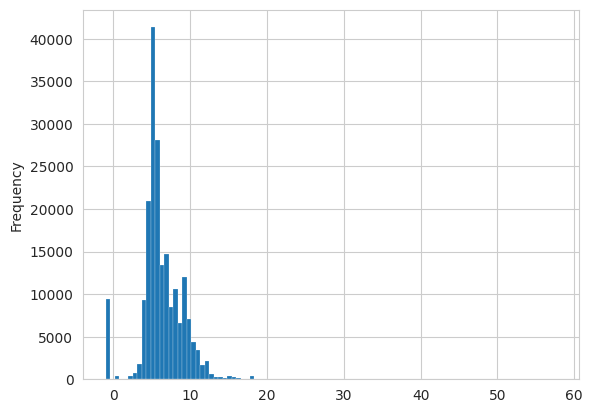

In [12]:
df_master["alcohol"].plot(kind="hist", bins=100)

Nous pouvons voir que nous avons quelques lignes avec alcohol = -1. Supprimons ces lignes.

<Axes: ylabel='Frequency'>

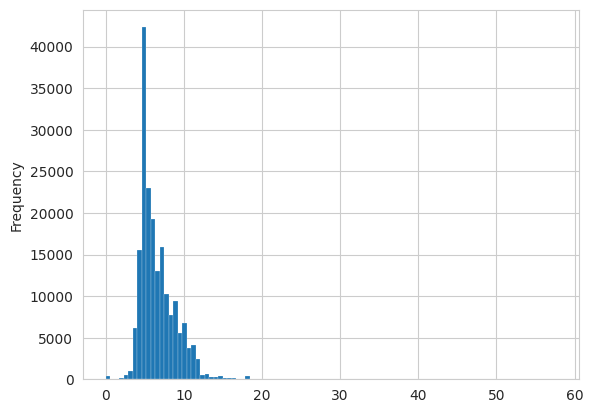

In [13]:
df_clean = (
    df_master
    .loc[lambda df: df.alcohol >= 0] # LINE TO BE REMOVED FOR STUDENTS
)

df_clean["alcohol"].plot(kind="hist", bins=100)

In [14]:
(
    df_features_and_target_train,
    df_features_and_target_test,
) = model_selection.train_test_split(df_clean, test_size=0.1)

In [15]:
target = ["rating"]
features = [
    "alcohol",
    "rating_appearance",
    "rating_aroma",
    "rating_palate",
    "rating_taste"
]
X_train, y_train, X_test, y_test = split_features_and_target(
    df_features_and_target_train,
    df_features_and_target_test,
    features,
    target,
)

pipe = pipeline.make_pipeline(
    linear_model.LinearRegression(), # LINE TO BE REMOVED FOR STUDENTS
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('linearregression', LinearRegression())])

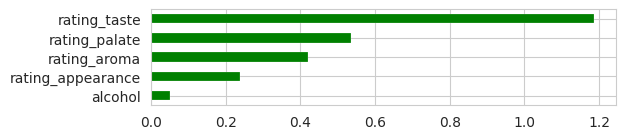

In [16]:
plot_features_coefficients(pipe, X_train)

Regardons l'impact sur la MAE

In [17]:
metric = metrics.get_scorer("neg_mean_absolute_error")
score = metric(pipe, X_train, y_train)
print("MAE train : " + str(round(score, 2)))
score = metric(pipe, X_test, y_test)
print("MAE test : " + str(round(score, 2)))

MAE train : -1.09
MAE test : -1.07


#### Encoding des variables catégorielles

Comment gérer les variables catégorielles ?

| type  | rating |
|-------------|----------------|
| Stout       | 14             |
| Belgian Ale | 11             |
| IPA         | 13             |

Il faut les convertir en valeurs numériques. Plusieurs approches existent pour cela :

Label encoding

| type  | type_encoded |rating  |
|-------------|--------------------|----------------|
| Stout       | 1                  |14              |
| Belgian Ale | 2                  |11              |
| IPA         | 3                  |13              |

Label encoding est une méthode simple pour encoder les variables catégorielles. Cependant, il crée une hiérarchie/un ordre entre les catégories, ce qui ne reflète pas toujours la réalité.

One hot encoding

| type  | type_Stout  | type_Belgian_Ale  | type_IPA  | rating |
|--------------|---|---|---|----|
| Stout        | 1 | 0 | 0 | 14 |
| Belgian Ale  | 0 | 1 | 0 | 11 |
| IPA          | 0 | 0 | 1 | 13 |

Ici, il n'y a pas de hiérarchie, mais en présence d'un grand nombre de catégories, cela ajoutera de nombreuses colonnes au jeu de données.


Essayons d'encoder certaines variables catégorielles en one-hot encoding ! Pour cela, nous allons créer une variable catégorielle personnalisée à partir de l'alcool.

In [18]:
df_clean.head(3)

,beer,brewery,alcohol,type,rating_appearance,rating_aroma,rating_palate,rating_taste,rating,timestamp,user,text
2747119,Breckenridge Oatmeal Stout,383,4.95,Stout,4,7,4,7,14,1217462400,blutt59,"bottle, oat nose with black color, bitter choc..."
680733,De Dolle Arabier,1163,8.00,Belgian Strong Ale,4,9,4,8,18,1291939200,AndreaDel,"Bottle. Orange color, big head. Aroma is hoppy..."
2797108,Grafensteiner Pils,2545,4.70,Classic German Pilsener,3,7,4,5,9,1306108800,Koelschtrinker,"Die Frage ist, ob ich das selbe Bier wie die a..."


In [19]:
def alcohol_level (row):
    if row['alcohol'] < 5.5 :
        return 'Light'
    if row['alcohol'] > 7 :
        return 'Strong'
    else :
        return 'Medium'

df_clean['alcohol_level'] = df_clean.apply(lambda row: alcohol_level(row), axis=1)

df_clean['alcohol_level'].value_counts()

<ipython-input-19-4143664853a9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['alcohol_level'] = df_clean.apply(lambda row: alcohol_level(row), axis=1)


,count
alcohol_level,
Light,74945
Strong,62413
Medium,53205


In [20]:
df_clean.head()

,beer,brewery,alcohol,type,rating_appearance,rating_aroma,rating_palate,rating_taste,rating,timestamp,user,text,alcohol_level
2747119,Breckenridge Oatmeal Stout,383,4.95,Stout,4,7,4,7,14,1217462400,blutt59,"bottle, oat nose with black color, bitter choc...",Light
680733,De Dolle Arabier,1163,8.00,Belgian Strong Ale,4,9,4,8,18,1291939200,AndreaDel,"Bottle. Orange color, big head. Aroma is hoppy...",Strong
2797108,Grafensteiner Pils,2545,4.70,Classic German Pilsener,3,7,4,5,9,1306108800,Koelschtrinker,"Die Frage ist, ob ich das selbe Bier wie die a...",Light
824617,New Glarus Raspberry Tart,1248,4.00,Fruit Beer,4,8,5,8,16,1211760000,polomagnifico,"Bottle thanks to nflmvp, thanks Steve! Aroma ...",Light
2730732,Nils Oscar Hop Yard IPA,1086,7.30,India Pale Ale (IPA),4,7,4,8,15,1275004800,dEnk,"Bottle, tfs Vaiz! Brownish amber, small head, ...",Strong


In [21]:
(
    df_features_and_target_train,
    df_features_and_target_test,
) = model_selection.train_test_split(df_clean, test_size=0.1, random_state=1)

target = ["rating"]
features = [
    "alcohol_level",
    "rating_appearance",
    "rating_aroma",
    "rating_palate",
    "rating_taste"
]
X_train, y_train, X_test, y_test = split_features_and_target(
    df_features_and_target_train,
    df_features_and_target_test,
    features,
    target,
)

X_train = (
    pd.get_dummies(X_train, columns=["alcohol_level"]) # LINE TO BE REMOVED FOR STUDENTS
)
X_test = (
    pd.get_dummies(X_test, columns=["alcohol_level"]) # LINE TO BE REMOVED FOR STUDENTS
)

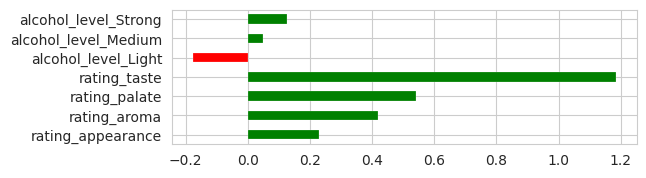

In [22]:
pipe = pipeline.make_pipeline(
    linear_model.LinearRegression(),
)

pipe.fit(X_train, y_train)

plot_features_coefficients(pipe, X_train)

In [23]:
metric = metrics.get_scorer("neg_mean_absolute_error")
score = metric(pipe, X_train, y_train)
print("MAE train : " + str(round(score, 2)))
score = metric(pipe, X_test, y_test)
print("MAE test : " + str(round(score, 2)))

MAE train : -1.09
MAE test : -1.08


#### Normalisation des features

In [24]:
target = ["rating"]
features = [
    "alcohol_level",
    "rating_appearance",
    "rating_aroma",
    "rating_palate",
    "rating_taste"
]
X_train, y_train, X_test, y_test = split_features_and_target(
    df_features_and_target_train,
    df_features_and_target_test,
    features,
    target,
)

X_train = pd.get_dummies(X_train, columns=["alcohol_level"])
X_test = pd.get_dummies(X_test, columns=["alcohol_level"])

pipe = pipeline.make_pipeline(
    compose.ColumnTransformer([
        ('scaler', preprocessing.StandardScaler(), ['rating_appearance', 'rating_aroma', 'rating_palate', 'rating_taste']),
        ('passthrough', "passthrough", ["alcohol_level_Strong", "alcohol_level_Medium", "alcohol_level_Light"])
    ], remainder='passthrough'),
    linear_model.LinearRegression(),
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['rating_appearance',
                                                   'rating_aroma',
                                                   'rating_palate',
                                                   'rating_taste']),
                                                 ('passthrough', 'passthrough',
                                                  ['alcohol_level_Strong',
                                                   'alcohol_level_Medium',
                                                   'alcohol_level_Light'])])),
                ('linearregression', LinearRegression())])

Vérifiez les features créées et la transformation appliquée à celles-ci à l'aide d'histogrammes.

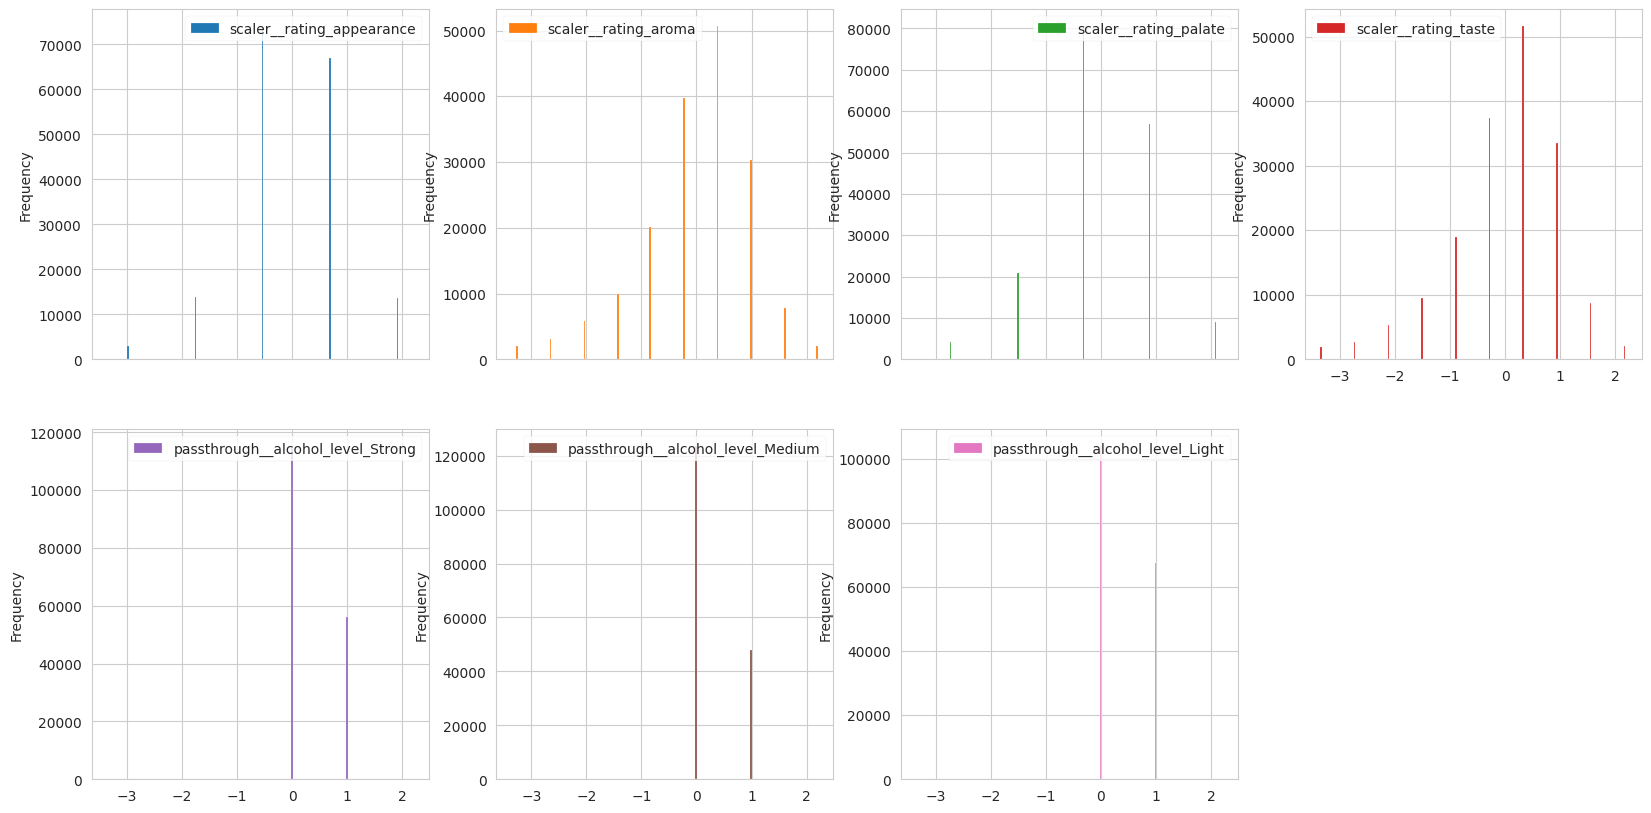

In [25]:
def plot_features_transformed_histograms(pipe, X, **kwargs):
    if len(pipe) > 1:
        columns = pipe[:-1].get_feature_names_out(X.columns)
        (
            pd.DataFrame(
                pipe[:-1].transform(X),
                columns=columns,
            ).plot.hist(subplots=True, layout=(2, 4), bins=200, figsize=(20, 10))
        )
    else:
        print("no plot: features not transformed")


plot_features_transformed_histograms(pipe, X_train)

Et maintenant, nous pouvons à nouveau examiner les coefficients de la régression linéaire. Ils peuvent désormais être interprétés comme l'importance des variables.

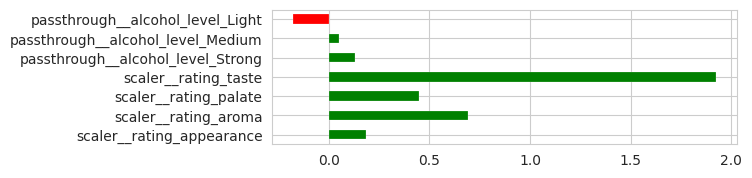

In [26]:
plot_features_coefficients(pipe, X_train)

In [27]:
metric = metrics.get_scorer("neg_mean_absolute_error")
score = metric(pipe, X_train, y_train)
print("MAE train : " + str(round(score, 2)))
score = metric(pipe, X_test, y_test)
print("MAE test : " + str(round(score, 2)))

MAE train : -1.09
MAE test : -1.08


#### Standardization des features

Nous avons également observé que certaines variables n'ont pas une distribution gaussienne. Or, l'une des hypothèses de la régression linéaire est que toutes les variables suivent une distribution gaussienne. Nous pouvons utiliser certains transformateurs pour rendre les variables plus normales.

In [28]:
target = ["rating"]
features = [
    "alcohol",
    "rating_appearance",
    "rating_aroma",
    "rating_palate",
    "rating_taste"
]
X_train, y_train, X_test, y_test = split_features_and_target(
    df_features_and_target_train,
    df_features_and_target_test,
    features,
    target,
)

pipe = pipeline.make_pipeline(
    preprocessing.PowerTransformer(), # LINE TO BE REMOVED FOR STUDENTS
    linear_model.LinearRegression(),
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('powertransformer', PowerTransformer()),
                ('linearregression', LinearRegression())])

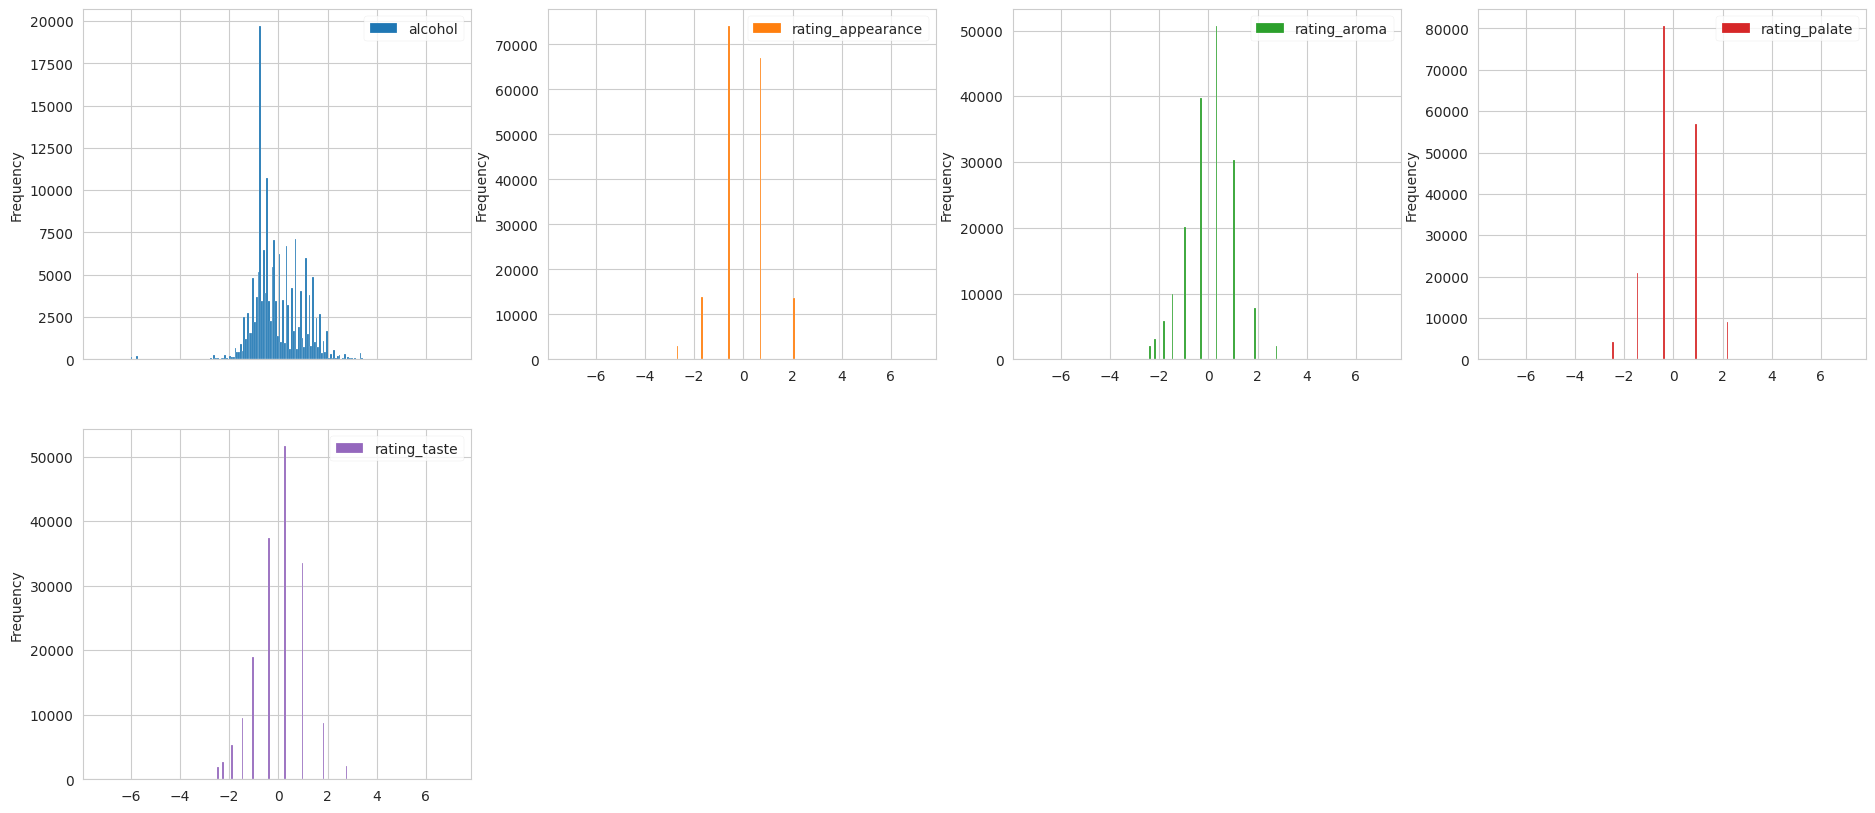

In [29]:
def plot_features_transformed_histograms(pipe, X, **kwargs):
    if len(pipe) > 1:
        columns = pipe[:-1].get_feature_names_out(X.columns)
        (
            pd.DataFrame(
                pipe[:-1].transform(X),
                columns=columns,
            ).plot.hist(subplots=True, layout=(2, 4), bins=200, figsize=(23, 10))
        )
    else:
        print("no plot: features not transformed")

plot_features_transformed_histograms(pipe, X_train)

In [30]:
metric = metrics.get_scorer("neg_mean_absolute_error")
score = metric(pipe, X_train, y_train)
print("MAE train : " + str(round(score, 2)))
score = metric(pipe, X_test, y_test)
print("MAE test : " + str(round(score, 2)))

MAE train : -1.19
MAE test : -1.18


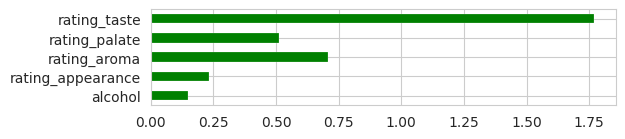

In [31]:
plot_features_coefficients(pipe, X_train)

#### Features polynomiales (optionnel)

Une autre étape possible de l'ingénierie des variables consiste à ajouter de la non-linéarité. Comme la régression linéaire est un modèle linéaire, la non-linéarité peut être prise en compte grâce à l'utilisation de features polynomiales.

In [32]:
target = ["rating"]
features = [
    "alcohol",
    "rating_appearance",
    "rating_aroma",
    "rating_palate",
    "rating_taste"
]
X_train, y_train, X_test, y_test = split_features_and_target(
    df_features_and_target_train,
    df_features_and_target_test,
    features,
    target,
)

pipe = pipeline.make_pipeline(
    preprocessing.PolynomialFeatures(degree=2), # LINE TO BE REMOVED FOR STUDENTS
    preprocessing.StandardScaler(),
    linear_model.LinearRegression(),
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

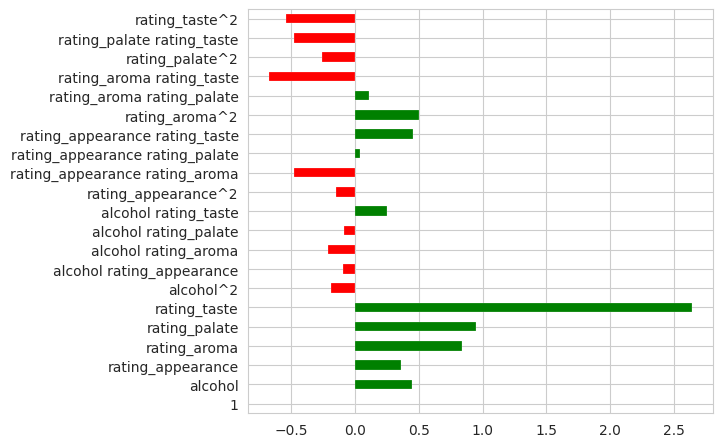

In [33]:
plot_features_coefficients(pipe, X_train)

In [34]:
metric = metrics.get_scorer("neg_mean_absolute_error")
score = metric(pipe, X_train, y_train)
print("MAE train : " + str(round(score, 2)))
score = metric(pipe, X_test, y_test)
print("MAE test : " + str(round(score, 2)))

MAE train : -1.06
MAE test : -1.06


#### Analyse du texte

 #### Nombre de mots & note moyenne des avis

Calculez le DataFrame "word counts", qui doit :
- Contenir :
  - Le nombre d'occurrences des mots dans les avis
  - La note moyenne des avis contenant ce mot
- Supprimez les mots vides (stop words)
- Supprimez les mots d'une seule lettre
- Conservez uniquement les 1000 mots les plus fréquents


In [35]:
def tokenize(serie):
    return (
        (serie)
        .str.lower() # LINE TO BE REMOVED FOR STUDENTS
        .str.replace(r"[^a-z]", " ")
        .str.replace(r" +", " ")
        .str.split(" ")
    )


df_words_count = (
    (df_clean)
    .assign(tokenized_text=lambda df: tokenize(df.text))
    .loc[:, ["rating", "tokenized_text"]]
    .explode("tokenized_text")
    .groupby("tokenized_text", as_index=False)
    .agg(["mean", "count"])
    .reset_index()
    .sort_values(by=("rating", "count"), ascending=False)
    .loc[lambda df: ~df.tokenized_text.isin(list(STOPWORDS))]
    .loc[lambda df: df.tokenized_text.str.len() > 1]
    .head(1000) # LINE TO BE REMOVED FOR STUDENTS
)

In [36]:
df_words_count.sort_values(by=[('rating',  'mean')])

index tokenized_text rating      
                                mean count
87390    87390           corn   8.36  2165
76903    76903          cheap   8.79  1153
252071  252071          water   9.10  1129
60309    60309          bland   9.74  1372
62886    62886         boring   9.92  1045
...        ...            ...    ...   ...
188864  188864        perfect  16.08  2141
257196  257196      wonderful  16.25  2040
109976  109976      fantastic  16.29  1047
42498    42498        amazing  16.34  1184
49833    49833        awesome  16.35  1122

[1000 rows x 4 columns]

 #### Moyenne des avis par mot

Calculez le dictionnaire "word ratings", contenant la note moyenne des avis pour chaque mot.

In [37]:
word_mean_review = (
    df_words_count.set_index("tokenized_text").rating["mean"].to_dict()
)

 #### Ensembles de mots positifs et négatifs
- Calculez l'ensemble "positive words", contenant les mots ayant une note ≥ 14.5.
- Calculez l'ensemble "negative words", contenant les mots ayant une note ≤ 13.

In [38]:
positive_words_set = set(
    df_words_count.loc[lambda df: df.rating["mean"] >= 14.5]
    .loc[:, "tokenized_text"]
    .tolist()
)
negative_words_set = set(
    df_words_count.loc[lambda df: df.rating["mean"] <= 13] # LINE TO BE REMOVED FOR STUDENTS
    .loc[:, "tokenized_text"]
    .tolist()
)

In [39]:
print(len(negative_words_set))
print(len(positive_words_set))

167
155


 #### Features & target
Calculez le DataFrame "features & target" contenant :

- Texte tokenisé
- Note moyenne des mots
- Nombre de mots positifs
- Nombre de mots négatifs
- Nombre négatif des mots négatifs

In [40]:
def compute_mean_word_rating(words, word_mean_review):
    return np.mean(
        [word_mean_review[w] for w in words if w in word_mean_review] or [0]
    )


def count_words_in_set(words, word_set):
    return len(set(words) & word_set)


df_features_and_target = (
    (df_clean)
    .assign(tokenized_text=lambda df: tokenize(df.text))
    .assign(
        mean_word_rating=lambda df: (df.tokenized_text).apply(
            compute_mean_word_rating, args=(word_mean_review,)
        )
    )
    .assign(
        positive_words_count=lambda df: (df.tokenized_text).apply(
            count_words_in_set, args=(positive_words_set,)
        )
    )
    .assign(
        negative_words_count=lambda df: (df.tokenized_text).apply(
            count_words_in_set, args=(negative_words_set,)
        )
    )
)

In [41]:
df_features_and_target.head(5)

,beer,brewery,alcohol,type,rating_appearance,rating_aroma,rating_palate,rating_taste,rating,timestamp,user,text,alcohol_level,tokenized_text,mean_word_rating,positive_words_count,negative_words_count
2747119,Breckenridge Oatmeal Stout,383,4.95,Stout,4,7,4,7,14,1217462400,blutt59,"bottle, oat nose with black color, bitter choc...",Light,"[bottle,, oat, nose, with, black, color,, bitt...",14.09,4,0
680733,De Dolle Arabier,1163,8.00,Belgian Strong Ale,4,9,4,8,18,1291939200,AndreaDel,"Bottle. Orange color, big head. Aroma is hoppy...",Strong,"[bottle., orange, color,, big, head., aroma, i...",13.75,1,0
2797108,Grafensteiner Pils,2545,4.70,Classic German Pilsener,3,7,4,5,9,1306108800,Koelschtrinker,"Die Frage ist, ob ich das selbe Bier wie die a...",Light,"[die, frage, ist,, ob, ich, das, selbe, bier, ...",0.00,0,0
824617,New Glarus Raspberry Tart,1248,4.00,Fruit Beer,4,8,5,8,16,1211760000,polomagnifico,"Bottle thanks to nflmvp, thanks Steve! Aroma ...",Light,"[bottle, thanks, to, nflmvp,, thanks, steve!, ...",13.83,1,2
2730732,Nils Oscar Hop Yard IPA,1086,7.30,India Pale Ale (IPA),4,7,4,8,15,1275004800,dEnk,"Bottle, tfs Vaiz! Brownish amber, small head, ...",Strong,"[bottle,, tfs, vaiz!, brownish, amber,, small,...",13.64,0,0


In [42]:
(
    df_features_and_target_train,
    df_features_and_target_test,
) = model_selection.train_test_split(df_features_and_target, test_size=0.1, random_state=1)

In [44]:
target = ["rating"]
features = [
    "rating_appearance",
    "rating_aroma",
    "rating_palate",
    "rating_taste",
    "alcohol",
    "positive_words_count", # LINE TO BE REMOVED FOR STUDENTS
    "negative_words_count", # LINE TO BE REMOVED FOR STUDENTS
    "mean_word_rating" # LINE TO BE REMOVED FOR STUDENTS
]
X_train, y_train, X_test, y_test = split_features_and_target(
    df_features_and_target_train,
    df_features_and_target_test,
    features,
    target,
)

pipe = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
    linear_model.LinearRegression(),
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

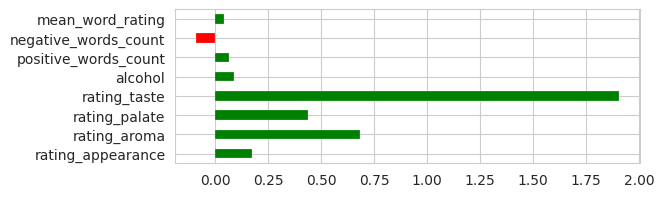

In [45]:
plot_features_coefficients(pipe, X_train)

In [46]:
metric = metrics.get_scorer("neg_mean_absolute_error")
score = metric(pipe, X_train, y_train)
print("MAE train : " + str(round(score, 2)))
score = metric(pipe, X_test, y_test)
print("MAE test : " + str(round(score, 2)))

MAE train : -1.08
MAE test : -1.08


 ### Learning curve

 #### Modèle simple
 Compute the training & validation R2-scores for various training sets sizes
 Calculez les R2-scores d'entraînement et de validation pour différentes tailles de jeu de données d'entraînement.

In [51]:
target = ["rating"]
features = [
    "rating_appearance",
    "rating_aroma",
    "rating_palate",
    "rating_taste",
    "alcohol",
    "positive_words_count",
    "negative_words_count",
    "mean_word_rating"
]
X_train, y_train, X_test, y_test = split_features_and_target(
    df_features_and_target_train,
    df_features_and_target_test,
    features,
    target,
)

model = linear_model.LinearRegression()
train_sizes_percent = np.geomspace(0.001, 1, 20)
(
    train_sizes,
    train_scores,
    validation_scores,
    _,
    _,
) = model_selection.learning_curve(
    model,
    X_train,
    y_train,
    cv=7,
    n_jobs=-1,
    train_sizes=train_sizes_percent,
    return_times=True,
    verbose=1,
)

[learning_curve] Training set sizes: [   147    211    304    437    629    905   1302   1873   2694   3876
   5575   8019  11536  16594  23870  34336  49391  71046 102196 147005]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    2.7s finished


Plottez les scores d'entraînement et de validation.

Étant donné qu'ils proviennent d'une validation croisée K-fold, vous avez K valeurs pour chaque taille d'ensemble d'entraînement : utilisez lineplot de seaborn pour tracer la valeur moyenne avec un intervalle de confiance.

[None]

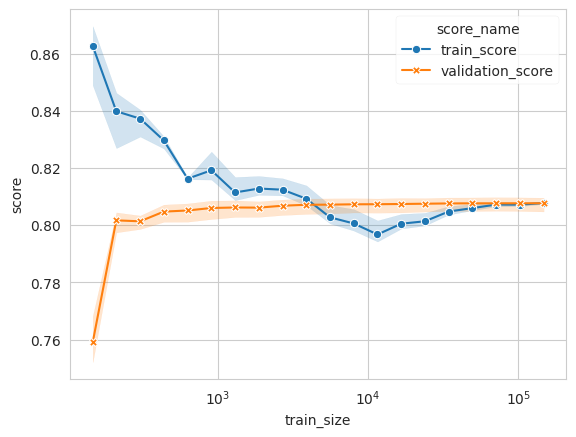

In [52]:
def compute_df_sizes(train_sizes):
    return pd.DataFrame(
        {
            "train_size_id": range(len(train_sizes)),
            "train_size": train_sizes,
        }
    )


def compute_df_score(scores, name):
    df = (
        pd.DataFrame(scores)
        .stack()
        .rename_axis(index=("train_size_id", "run_id"))
        .rename(name)
        .reset_index()
    )
    return df


def compute_df_scores_long(train_scores, validation_scores, train_sizes):
    return (
        compute_df_score(train_scores, name="train_score")
        .merge(compute_df_score(validation_scores, name="validation_score"))
        .merge(compute_df_sizes(train_sizes), on="train_size_id")
        .melt(
            id_vars=["train_size_id", "run_id", "train_size"],
            value_vars=["train_score", "validation_score"],
            var_name="score_name",
            value_name="score",
        )
    )


df_scores_long = compute_df_scores_long(
    train_scores, validation_scores, train_sizes
)
sns.lineplot(
    data=df_scores_long.loc[lambda df: df.score > 0.5],
    x="train_size",
    y="score",
    hue="score_name",
    style="score_name",
    dashes=False,
    markers=True,
).set(xscale="log")

Plottez l'importance des variables du modèle linéaire entraîné sur l'ensemble complet des données.

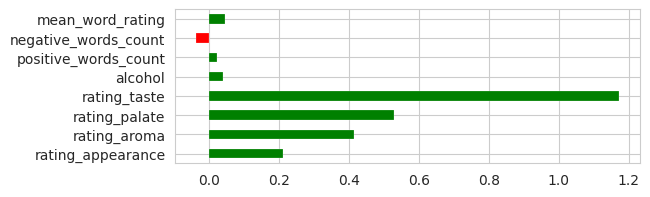

In [53]:
pipe = pipeline.make_pipeline(model)
pipe.fit(X_train, y_train)
plot_features_coefficients(pipe, X_train)

 #### Modèle complexe (optionnel)
Calculez les R2-scores d'entraînement et de validation pour différentes tailles d'ensembles d'entraînement.

Plottez les scores d'entraînement et de validation.

[learning_curve] Training set sizes: [   137    197    283    408    587    844   1215   1748   2514   3617
   5203   7485  10767  15488  22278  32047  46098  66309  95383 137204]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.3min finished


[None]

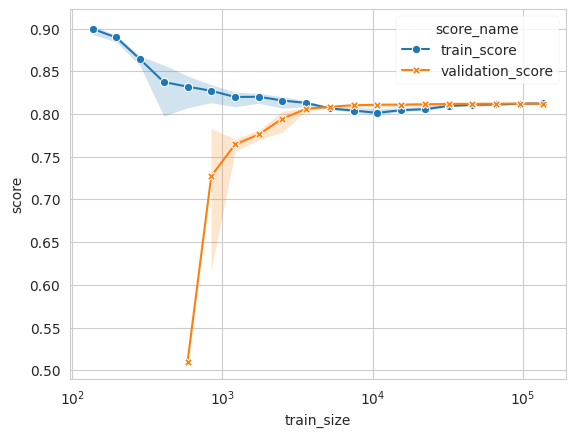

In [55]:
features = [
    "rating_appearance",
    "rating_aroma",
    "rating_palate",
    "rating_taste",
    "alcohol",
    "user_degree",
    "positive_words_count",
    "negative_words_count",
    "mean_word_rating"
]

pipe = pipeline.make_pipeline(
    preprocessing.PolynomialFeatures(include_bias=False, degree=2),
    preprocessing.PowerTransformer(),
    linear_model.LinearRegression(),
)
(
    train_sizes,
    train_scores,
    validation_scores,
    fit_times,
    _,
) = model_selection.learning_curve(
    pipe,
    X_train,
    y_train,
    cv=5,
    n_jobs=-1,
    train_sizes=train_sizes_percent,
    return_times=True,
    verbose=1,
)

df_scores_long = compute_df_scores_long(
    train_scores, validation_scores, train_sizes
)
sns.lineplot(
    data=df_scores_long.loc[lambda df: df.score > 0.5],
    x="train_size",
    y="score",
    hue="score_name",
    style="score_name",
    dashes=False,
    markers=True,
).set(xscale="log")

Plottez l'importance des variables du modèle linéaire avec features polynomiales, entraîné sur l'ensemble complet des données avec 6 variables.

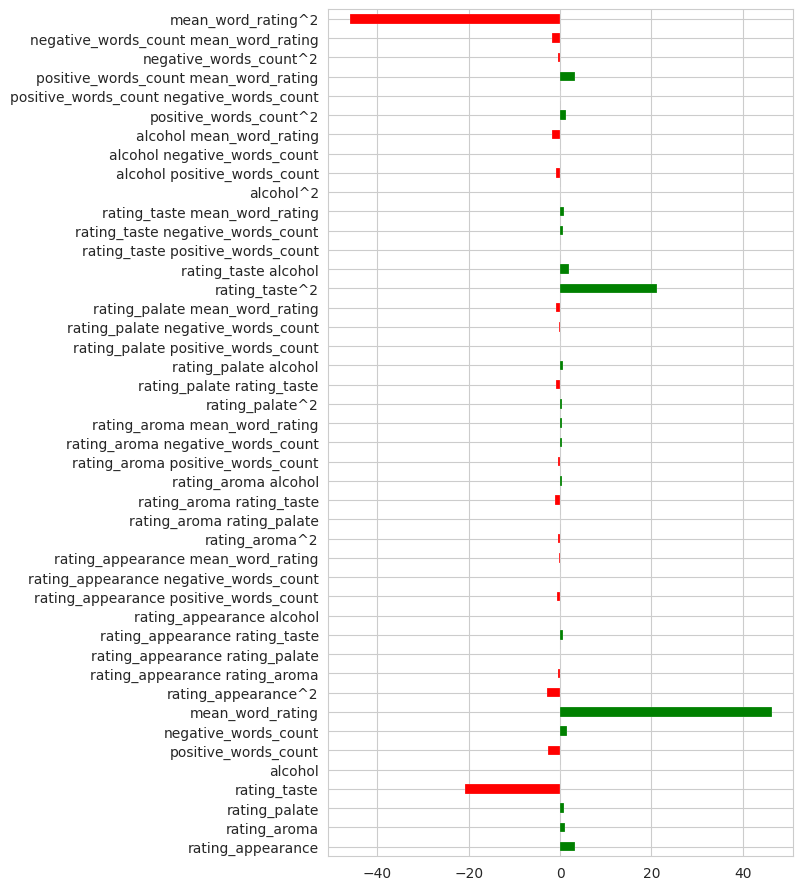

In [56]:
pipe.fit(X_train, y_train)
plot_features_coefficients(pipe, X_train)

#### Sur apprentissage et sous aprentissage

Le sur-apprentissage (overfitting) se produit lorsqu'un modèle s'adapte très bien aux données d'entraînement mais ne généralise pas bien aux nouvelles données qu'il n'a jamais vues. Il peut avoir plusieurs causes :

- Le jeu de données d'entraînement n'est pas représentatif des données réelles.
- Le modèle est trop complexe et apprend du bruit présent dans les données d'entraînement.

Le sous-apprentissage (underfitting) se produit lorsque le modèle est trop simple pour capturer les motifs des données. Dans ce cas, le modèle aurait de mauvaises performances aussi bien sur l'ensemble d'entraînement que sur l'ensemble de test.

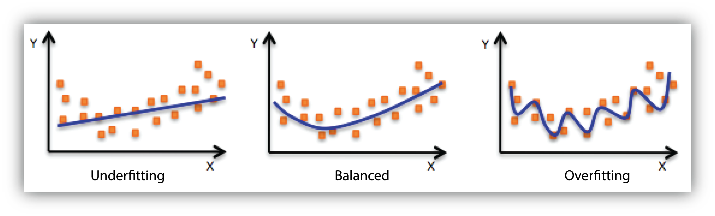

Pour éviter le sur apprentissage (overfitting), plusieurs actions peuvent être mises en place.

À partir de maintenant, nous utiliserons un jeu de données contenant 2000 lignes et 7 features.

In [57]:
N = 2000
features = [
    "rating_appearance",
    "rating_aroma",
    "rating_palate",
    "rating_taste",
    "mean_word_rating",
    "positive_words_count",
    "negative_words_count",
]
X_train, y_train, X_test, y_test = split_features_and_target(
    df_features_and_target_train,
    df_features_and_target_test,
    features,
    target,
    N,
)

### Régularisation du modèle

La régularisation permet de réduire la complexité du modèle. Pour cela, nous ne minimiserons pas uniquement notre erreur de coût, mais une fonction objectif incluant un terme de régularisation.

$$min \sum_{i}(y_i – X_i\beta)^2 + Regularization$$

 ### Ridge - Régularisation L2

Pour la régression Ridge, le terme de régularisation sera la norme L2 des coefficients :    

$$min \sum_{i}(y_i – X_i\beta)^2 + \alpha\vert\vert\beta\vert\vert_2^2$$

où $$\vert\vert\beta\vert\vert_2^2 = \sum_{j}\beta_j^2$$

Elle est principalement utilisée en présence de variables corrélées, qui peuvent entraîner des comportements inattendus au niveau des coefficients.


 #### Boucle simple sur le paramètre de régularisation

- Fittez n modèles pour n valeurs de alpha (paramètre de régularisation).
- Calculez les scores.
- Récupérez les valeurs des coefficients.

In [58]:
alphas = np.logspace(-6, 3, 28)

def compute_scores_and_coefs(pipe, alphas):
    scores = dict()
    coefs = dict()
    for alpha in tqdm(alphas):
        pipe[-1].set_params(alpha=alpha)
        pipe.fit(X_train, y_train)
        score_train = compute_score(pipe, X_train, y_train, metric_names = ["neg_mean_absolute_error"], label="train")
        score_test = compute_score(pipe, X_test, y_test, metric_names = ["neg_mean_absolute_error"], label="test")
        scores.update({alpha: {**score_train, **score_test}})
        coef = dict(
            zip(get_feature_names(pipe, X_train), pipe[-1].coef_.reshape(-1))
        )
        coefs.update({alpha: coef})
    return scores, coefs


pipe = pipeline.make_pipeline(
    preprocessing.PolynomialFeatures(include_bias=False, degree=2),
    preprocessing.PowerTransformer(),
    linear_model.Ridge(),
)
scores, coefs = compute_scores_and_coefs(pipe, alphas)

100%|██████████| 28/28 [00:08<00:00,  3.42it/s]


Plottez l'évolution du score en fonction de alpha.

<Axes: >

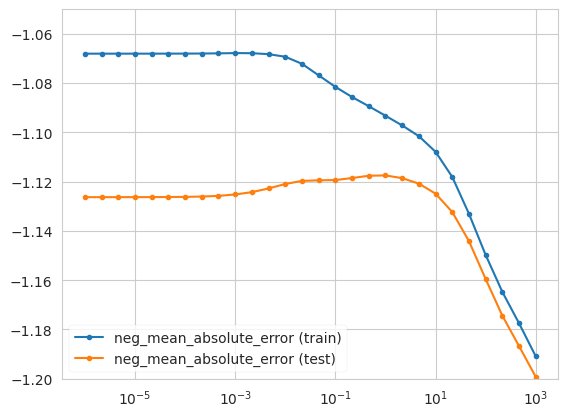

In [59]:
(
    pd.DataFrame.from_dict(scores, orient="index")
    .plot(logx=True, marker=".", ylim=(-1.2, -1.05))
)

 Plottez l'évolution des coefficients en fonction d'`alpha`

<Axes: >

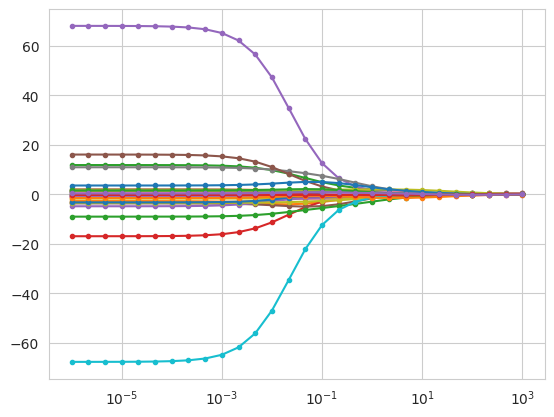

In [60]:
(
    pd.DataFrame.from_dict(coefs, orient="index").plot(
        logx=True, legend=False, marker="."
    )
)

 Plottez les features importances d'un modèle entraîné avec une valeur spécifique d'`alpha` (e.g: `alpha=1e-1`)

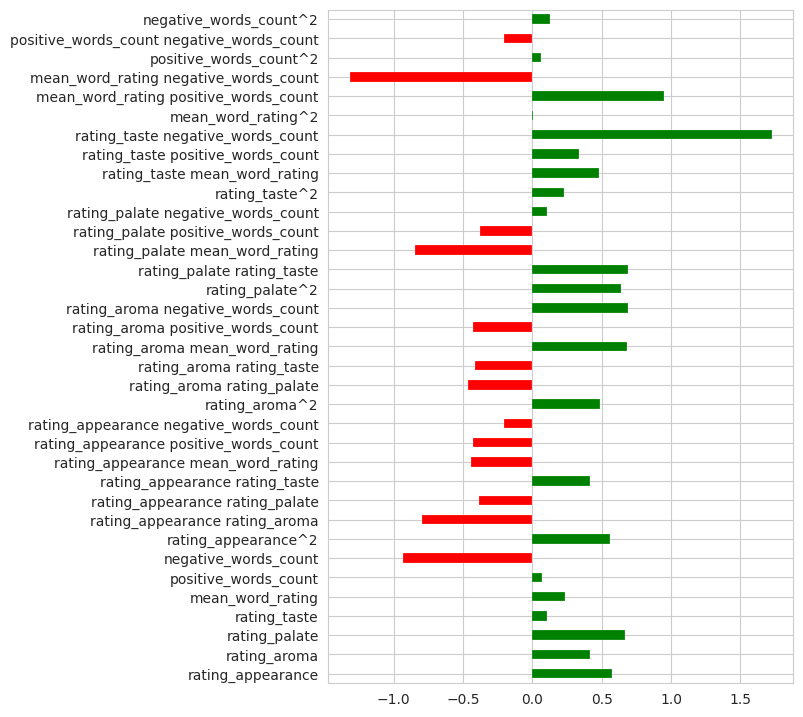

In [61]:
pipe[-1].set_params(
    alpha=1e1 # LINE TO BE REMOVED FOR STUDENTS
)
pipe.fit(X_train, y_train)
plot_features_coefficients(pipe, X_train)